In [3]:
#import all libraries needed

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV


In [4]:
from sklearn.datasets import fetch_20newsgroups

# Fetch the training data
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
# newsgroups_train = fetch_20newsgroups(subset='train')
# Fetch the test data
newsgroups_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))
# newsgroups_test = fetch_20newsgroups(subset='test')
print("attributes for data:",dir(newsgroups_train))
print("attributes for test:",dir(newsgroups_test))


attributes for data: ['DESCR', 'data', 'filenames', 'target', 'target_names']
attributes for test: ['DESCR', 'data', 'filenames', 'target', 'target_names']


In [5]:
len_train = len(newsgroups_train.data)
len_test = len(newsgroups_test.data)
print("# of training data:",len_train)
print("# of testing data:", len_test)  

train_list_category = []
for target_names in newsgroups_train.target_names and newsgroups_test.target_names:
    train_list_category.append(target_names)
    
        
print("category:",train_list_category)    
print("length of category:",len(train_list_category))

# print(newsgroups_train.data[20000])  # print the first document
# print("\nClass label:", newsgroups_train.target[20000])  # print its associated label
# print("\nClass name:", newsgroups_train.target_names[newsgroups_train.target[0]])  # print the name of the class

# of training data: 11314
# of testing data: 7532
category: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
length of category: 20


In [6]:
#Data Preprocessing

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TF-IDF vectorizer
vectorizer = TfidfVectorizer(
    stop_words='english',
    norm='l2' # L2 /l1
)
# Fit and transform the training data
X_train = vectorizer.fit_transform(newsgroups_train.data)

# Transform the test data
X_test = vectorizer.transform(newsgroups_test.data)

# Target labels
y_train = newsgroups_train.target
y_test = newsgroups_test.target

print("X_train.shape:",X_train.shape)
print("X_test.shape:",X_test.shape)



X_train.shape: (11314, 101322)
X_test.shape: (7532, 101322)


Test accuracy for C=0.01: 0.6552
Test accuracy for C=0.1: 0.6660
Test accuracy for C=1: 0.6872
Test accuracy for C=10: 0.6905
Test accuracy for C=100: 0.6840


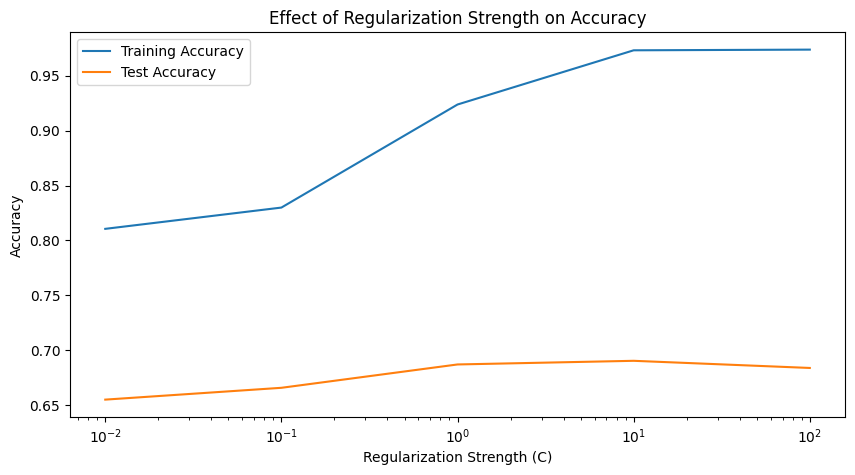

In [8]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# List of regularization strengths to try
C_values = [0.01, 0.1, 1, 10, 100]
train_scores = []
test_scores = []

# Loop over the values of C
for C_val in C_values:
    # Create and train the logistic regression model with the current value of C
    logreg = LogisticRegression(max_iter=10000, C=C_val, class_weight='balanced', penalty='l2')
    logreg.fit(X_train, y_train)
    
    # Evaluate and store the scores
    train_scores.append(logreg.score(X_train, y_train))
    test_scores.append(logreg.score(X_test, y_test))

# Print the test scores for each value of C
for C_val, score in zip(C_values, test_scores):
    print(f"Test accuracy for C={C_val}: {score:.4f}")

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(C_values, train_scores, label='Training Accuracy')
plt.plot(C_values, test_scores, label='Test Accuracy')
plt.xscale('log')  # Use a log scale for the C values
plt.xlabel('Regularization Strength (C)')
plt.ylabel('Accuracy')
plt.title('Effect of Regularization Strength on Accuracy')
plt.legend()
plt.show()

# With the stopwords
# Test accuracy for C=0.01: 0.5000
# Test accuracy for C=0.1: 0.5951
# Test accuracy for C=1: 0.6734
# Test accuracy for C=10: 0.6827
# Test accuracy for C=100: 0.6790

# Without the stopwords
# Test accuracy for C=0.01: 0.6552
# Test accuracy for C=0.1: 0.6660
# Test accuracy for C=1: 0.6872
# Test accuracy for C=10: 0.6905
# Test accuracy for C=100: 0.6840


In [31]:
# Create a decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier
dtree = DecisionTreeClassifier()

# Train the model
dtree.fit(X_train, y_train)

# Score on training and test data
dtree_train_score = dtree.score(X_train, y_train)
dtree_test_score = dtree.score(X_test, y_test)

print(f"Decision Tree - Training accuracy: {dtree_train_score:.4f}")
print(f"Decision Tree - Test accuracy: {dtree_test_score:.4f}")


Decision Tree - Training accuracy: 0.9723
Decision Tree - Test accuracy: 0.4376


In [23]:
#Support Vector Machines (LinearSVC)
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)
y_train = newsgroups_train.target
y_test = newsgroups_test.target

from sklearn.svm import LinearSVC

svc_model = LinearSVC(dual=False)
svc_model.fit(X_train, y_train)

train_accuracy = svc_model.score(X_train, y_train)
test_accuracy = svc_model.score(X_test, y_test)

print(f"LinearSVC - Training accuracy: {train_accuracy:.4f}")
print(f"LinearSVC - Test accuracy: {test_accuracy:.4f}")


LinearSVC - Training accuracy: 0.9701
LinearSVC - Test accuracy: 0.6804


In [24]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier

# Initialize AdaBoost classifier
ada_clf = AdaBoostClassifier(n_estimators=50, random_state=0)

# Train AdaBoost
ada_clf.fit(X_train, y_train)

# Get training and test accuracies
train_accuracy = ada_clf.score(X_train, y_train)
test_accuracy = ada_clf.score(X_test, y_test)

print("AdaBoost - Training accuracy:", round(train_accuracy, 4))
print("AdaBoost - Test accuracy:", round(test_accuracy, 4))


AdaBoost - Training accuracy: 0.4209
AdaBoost - Test accuracy: 0.3721


In [25]:

from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the classifier
rf_clf.fit(X_train, y_train)

# Get training and test accuracies
train_accuracy_rf = rf_clf.score(X_train, y_train)
test_accuracy_rf = rf_clf.score(X_test, y_test)

print(f"Random Forest - Training accuracy: {train_accuracy_rf:.4f}")
print(f"Random Forest - Test accuracy: {test_accuracy_rf:.4f}")


Random Forest - Training accuracy: 0.9735
Random Forest - Test accuracy: 0.6077


In [55]:
#Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

# Train the Gradient Boosting classifier
gb_clf.fit(X_train, y_train)

# Calculate training accuracy
train_accuracy = gb_clf.score(X_train, y_train)
print(f"Gradient Boosting - Training accuracy: {train_accuracy:.4f}")

# Calculate test accuracy
test_accuracy = gb_clf.score(X_test, y_test)
print(f"Gradient Boosting - Test accuracy: {test_accuracy:.4f}")


Gradient Boosting - Training accuracy: 0.3641
Gradient Boosting - Test accuracy: 0.3031


In [42]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Number of folds for cross-validation
n_folds = 5

# Dictionary to store cross-validation scores
cv_scores = {}

# Perform k-fold cross-validation for different values of C
for C_val in C_values:
    logreg = LogisticRegression(max_iter=10000, C=C_val, class_weight='balanced', penalty='l2')
    
    # Compute cross-validation score
    scores = cross_val_score(logreg, X_train, y_train, cv=n_folds, scoring='accuracy')
    cv_scores[C_val] = scores
    
    print(f"Cross-validation scores for C={C_val}: {scores}")
    print(f"Mean CV accuracy for C={C_val}: {np.mean(scores):.4f}")

# After collecting all the cross-validation scores, you might want to determine the best C value
best_C_val = max(cv_scores, key=lambda k: np.mean(cv_scores[k]))
print(f"Best C value based on cross-validation: {best_C_val}")

# You can then train a final model using the best C value and evaluate on the test set
final_logreg = LogisticRegression(max_iter=10000, C=best_C_val, class_weight='balanced', penalty='l2')
final_logreg.fit(X_train, y_train)
final_test_score = final_logreg.score(X_test, y_test)
print(f"Final Test accuracy with best C with full model ({best_C_val}): {final_test_score:.4f}")


Cross-validation scores for C=0.01: [0.68095449 0.67741935 0.68935042 0.68669907 0.68169761]
Mean CV accuracy for C=0.01: 0.6832
Cross-validation scores for C=0.1: [0.69067609 0.68228016 0.69951392 0.69332744 0.69098143]
Mean CV accuracy for C=0.1: 0.6914
Cross-validation scores for C=1: [0.72514361 0.71763146 0.72867875 0.73221388 0.72325376]
Mean CV accuracy for C=1: 0.7254
Cross-validation scores for C=10: [0.74237738 0.72867875 0.73840035 0.73486522 0.74270557]
Mean CV accuracy for C=10: 0.7374
Cross-validation scores for C=100: [0.73751657 0.72779496 0.7308882  0.72779496 0.73651636]
Mean CV accuracy for C=100: 0.7321
Best C value based on cross-validation: 10
Final Test accuracy with best C (10): 0.6718


In [1]:
# Assuming you have stored the best cross-validation scores for each model in a dictionary called 'best_scores'
best_scores = {
    'Logistic Regression': 0.74,  # replace with actual best score
    'Decision Tree': best_score_dt,        # replace with actual best score
    'Linear SVC': best_score_svc,          # replace with actual best score
    'AdaBoost': best_score_ab,             # replace with actual best score
    'Random Forest': best_score_rf         # replace with actual best score
} 

print("Model Performance Comparison:\n")

# Print the header of the table
print(f"{'Model':<20} {'Cross-Val Accuracy':<20} {'Test Accuracy':<20}")

# Print the scores for each model
for model, scores in best_scores.items():
    print(f"{model:<20} {scores['cv']:<20.4f} {scores['test']:<20.4f}")


NameError: name 'best_score_dt' is not defined